# Project: Univariate Linear Regression

* **Business Understanding Phase:**
    In this Project we want to model how Profit in Bike Sharing Business Increases with the increase in Population in the City.

* **Data Understanding Phase:**
    The Data Consists of a Profit in Dollars of Bike Sharing Business with respect to the Population in that City.
    
### Lets us take a look at the data


In [1]:
# importing necessary Libraries
import matplotlib.pyplot as plt #Data Visualization Library
import numpy as np  #High Level Library for Linear Alegbra related operations and manupilation
import pandas as pd  #High Level Library for Data Wrangling, Manupilation, viewing etc
import seaborn as sns # High Level Data Visualization Library built on Matplotlib library
plt.style.use('ggplot') # Setting default style
%matplotlib inline

In [2]:
# Importing data
data = pd.read_csv('bike_sharing_data.txt')
data.head() # reading top 5 lines of Data

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# Getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


**It can be observed that the data contains 2 Columns; Population and Profit, containing a total 97 instances**

## Visualizing the Data

Text(0, 0.5, 'Profit in $10000s')

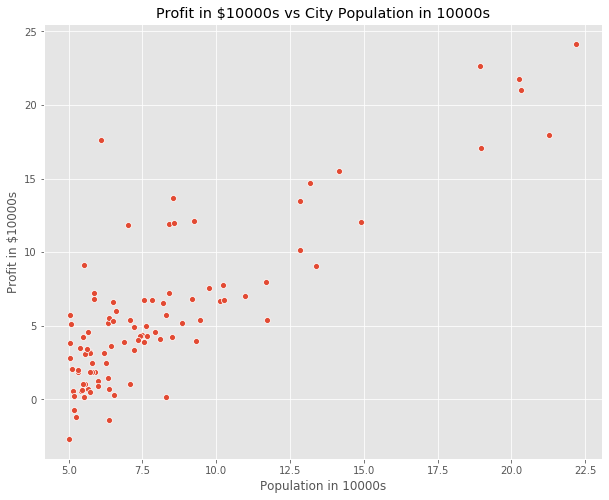

In [4]:
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x='Population', y = 'Profit', data = data, ax=ax)
ax.set_title('Profit in $10000s vs City Population in 10000s')
ax.set_xlabel('Population in 10000s')
ax.set_ylabel('Profit in $10000s')

* **Data Preparation Phase:**
    
    In this phase we will prepare the data for modeling. First we will segregate the data in 2 parts, first part the independent variable/s or feature/s or predictor variable/s and the other - dependent variable or response variable. After this segregation we will add an intercept or bias variable equal to 1 for each instance in the dataset.

In [5]:
m = len(data) #number of instances
X= np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1) # adding the intercept term 
y=data.Profit.values.reshape(m,1)
theta=np.zeros((2,1)) #our initial Theta

* **Model Preparation Phase:**

    During this phase we will build a univariate regression model to predict the Profit based on the population of cities

### Simple Linear Regression

$h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0x_0 + \theta_1x_1$$
The $\theta$ values are "weights" and $x_0$ is the bias term


The objective of linear regression is to minimize the cost function which is given by:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where m is the number of samples in the data

In [6]:
def cost_function(X, y, theta):
    """
    Takes the inputs:
    X: Feature matrix of shape (m,2)
    y: Respose variable of shape (m,1)
    theta: Weights of shape(2,1)
    
    Outputs: 
    
    cost
    
    """
    
    m = len(y)
    h_theta = X.dot(theta)
    error = h_theta-y
    cost = 1/(2*m)*((error).T).dot((error))
    cost = np.squeeze(cost).tolist()
    return cost

#### Updating the weights

To update the weight vector $\theta$, gradient descent is applied to iteratively improve your model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j $$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.

Hence, compuationally to minimize the cost function $J(\theta)$ the equation below is updated and repeated until the convergence is met
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [7]:
# Testing our Cost Function with intial values of theta which are [0,0]
cost_function(X, y, theta)

32.07273387745567

In [8]:
def gradient_descent(X,y, theta, alpha, num_iters):
    '''
        Input:
        X: matrix of features which is (m,2)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (2,1)
        alpha: learning rate
        num_iters: number of iterations we want to train our model for
    Output:
        costs: all the costs that we calculated during the gradient decent algorithm
        theta: your final weight vector
    '''
    m = len(y)
    costs=[]
    for i in range(num_iters):
        h_theta = X.dot(theta)
        delta = np.dot(X.transpose(),(h_theta-y))
        theta -=alpha * 1/m*delta               #updating the theta vector
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [9]:
theta , costs = gradient_descent(X, y , theta, alpha = 0.01, num_iters = 2000)
print('h(x) = {} + {}x1'.format(str(round(theta[0,0], 2)), str(round(theta[1,0],2))))

h(x) = -3.79 + 1.18x1


* **Model Evaluation Phase:**
    In this phase, we will see how the model has converged over the number of iterations and whether the regression is able to explain our model

### Visualising the Cost Function $J(\theta)$

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Decent')

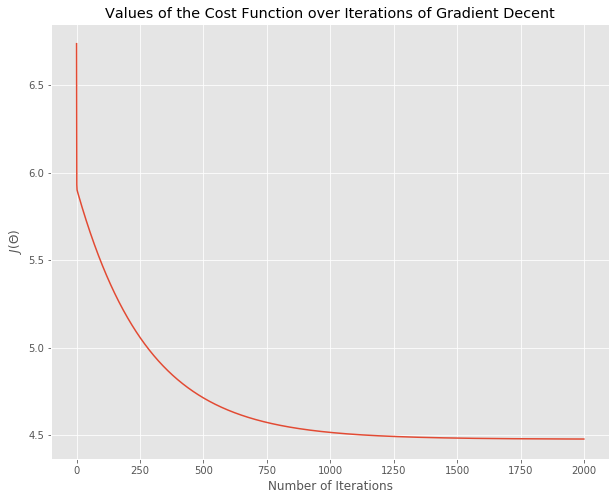

In [10]:
plt.figure(figsize = (10,8))
plt.plot(costs)
plt.xlabel('Number of Iterations')
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Decent")

### Visualizing our Model using Regression Line 

Text(0.5, 1.0, 'Linear Regression Fit')

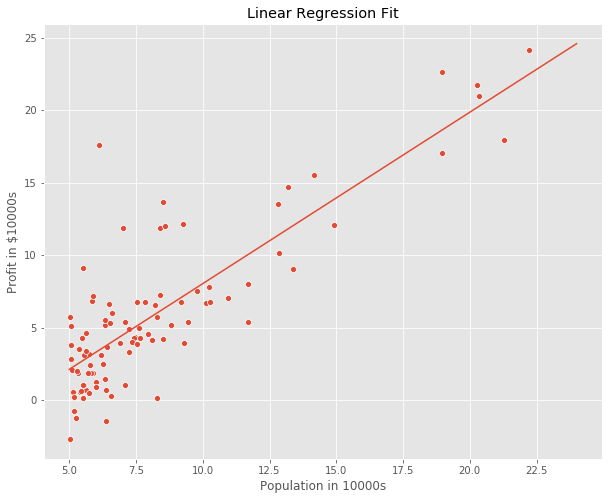

In [11]:
theta = np.squeeze(theta)
plt.figure(figsize = (10,8))
sns.scatterplot(x='Population', y = 'Profit', data = data)
x_value=[x for x in range(5,25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression Fit")

**Here we are able to see that the regression line is able explain the variablity of the response variable with respect to predictor variable which is City's Population in this case.**

* **Model Deployment Phase:**
    
    In this phase, we draw inferences/prediction from the model on the unseen values

### Inference using the optimized $\theta$ values

$h_\theta(x) = \theta^Tx$

In [12]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(),x)
    return y_pred

In [13]:
y_pred_1 = predict(np.array([1,4]), theta) *10000
print("For a population of 40000 people, the model predicts a profit of $"+str(round(y_pred_1,2)))
print('\n')
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
print("For a population of 83000 people, the model predicts a profit of $"+str(round(y_pred_2,2)))

For a population of 40000 people, the model predicts a profit of $9407.83


For a population of 83000 people, the model predicts a profit of $60242.97


## The End ##